# Event-wise Energy Deposition

Simulate the concrete overburden, two walls, floor, cosmic ray taggers, and LAr in the cryostat.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cosmic Background

In [2]:
cosmicFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/evtv2/cosmicEvt.csv'
cosmic = pd.read_csv( cosmicFile )

### Number of events with cosmic and cosmic-induced particles traversing the LArTPC

In [ ]:
cosmic

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,60,19.480109,5.299626,23.250693,48.155868,48.155868,270.147367,0.0,0.0,0.0,0.0,0.0,0.0,0.016032,0.003206,265.732584,0.0,0.0,0.0
1,0,251,0.084589,0.069128,0.021171,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,61.944021,0.0,0.0,0.0
2,0,364,0.392915,0.344161,0.300577,15.625915,15.625915,81.786198,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,14.896122,0.0,0.0,0.0
3,0,390,0.148901,0.126668,0.059747,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,147.840044,0.0,0.0,0.0
4,0,480,0.334323,0.334323,0.287406,18.008526,18.008526,103.657277,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18657,2499,392,22.664552,3.312128,7.976293,148.020208,148.020208,698.942647,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,143.987112,0.0,0.0,0.0
18658,2499,435,4.099408,1.040348,1.839662,56.114293,56.114293,294.473356,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,64.343670,0.0,0.0,0.0
18659,2499,562,1.590734,0.641247,0.589966,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,271.968224,0.0,0.0,0.0
18660,2499,595,6.216136,1.233605,2.199456,72.318518,72.318518,407.155860,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


18662 out of 2.5M cosmogenic events have energy deposition in the LArTPC.  0.75% \
That said, 0.75% of the neutrino events will have cosmogenic pile-up - negligible.

### Number of events with at least a muon

In [4]:
cosmic[cosmic.muMaxLength>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,60,19.480109,5.299626,23.250693,48.155868,48.155868,270.147367,0.0,0.0,0.0,0.0,0.0,0.0,0.016032,0.003206,265.732584,0.0,0.0,0.0
2,0,364,0.392915,0.344161,0.300577,15.625915,15.625915,81.786198,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,14.896122,0.0,0.0,0.0
4,0,480,0.334323,0.334323,0.287406,18.008526,18.008526,103.657277,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,0,528,9.059547,6.116250,32.699851,39.150199,39.150199,203.782757,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,129.676346,0.0,0.0,0.0
6,0,566,17.444762,5.594015,16.445303,75.073018,75.073018,400.061295,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,155.849321,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18656,2499,352,64.391443,13.176237,54.768167,130.115754,130.115754,686.141080,0.0,0.0,0.0,0.0,0.0,0.0,0.051301,0.003206,272.326955,0.0,0.0,0.0
18657,2499,392,22.664552,3.312128,7.976293,148.020208,148.020208,698.942647,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,143.987112,0.0,0.0,0.0
18658,2499,435,4.099408,1.040348,1.839662,56.114293,56.114293,294.473356,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,64.343670,0.0,0.0,0.0
18660,2499,595,6.216136,1.233605,2.199456,72.318518,72.318518,407.155860,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


10955 events have at least a muon track out of 2.5M events simulated.  That means 0.44%.

In [6]:
cosmic[cosmic.muMaxLength>50.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,60,19.480109,5.299626,23.250693,48.155868,48.155868,270.147367,0.0,0.0,0.0,0.0,0.0,0.0,0.016032,0.003206,265.732584,0.0,0.0,0.0
2,0,364,0.392915,0.344161,0.300577,15.625915,15.625915,81.786198,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,14.896122,0.0,0.0,0.0
4,0,480,0.334323,0.334323,0.287406,18.008526,18.008526,103.657277,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,0,528,9.059547,6.116250,32.699851,39.150199,39.150199,203.782757,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,129.676346,0.0,0.0,0.0
6,0,566,17.444762,5.594015,16.445303,75.073018,75.073018,400.061295,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,155.849321,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18656,2499,352,64.391443,13.176237,54.768167,130.115754,130.115754,686.141080,0.0,0.0,0.0,0.0,0.0,0.0,0.051301,0.003206,272.326955,0.0,0.0,0.0
18657,2499,392,22.664552,3.312128,7.976293,148.020208,148.020208,698.942647,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,143.987112,0.0,0.0,0.0
18658,2499,435,4.099408,1.040348,1.839662,56.114293,56.114293,294.473356,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,64.343670,0.0,0.0,0.0
18660,2499,595,6.216136,1.233605,2.199456,72.318518,72.318518,407.155860,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [62]:
cosmic[cosmic.muMaxLength>600.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
9,1,149,37.636890,20.959286,76.159634,120.046222,120.046222,627.822813,0.0,0.0,0.0,0.0,0.0,0.0,0.035547,0.003206,300.296782,0.0,0.0,0.0
16,1,574,32.270135,9.366058,31.641659,132.482616,132.482616,674.194407,0.0,0.0,0.0,0.0,0.0,0.0,0.025650,0.003206,339.333718,0.0,0.0,0.0
18,1,620,28.428994,7.959160,41.335795,116.721691,116.721691,631.314544,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,99.457584,0.0,0.0,0.0
23,2,247,18.833448,3.496542,7.835551,118.826059,118.826059,625.242819,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,8.062108,0.0,0.0,0.0
26,2,289,312.667059,79.527756,409.203115,119.086048,119.086048,632.718560,0.0,0.0,0.0,0.0,0.0,0.0,0.167956,0.003206,519.734562,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18647,2498,624,90.653570,31.133631,142.508096,113.879259,113.879259,602.283008,0.0,0.0,0.0,0.0,0.0,0.0,0.058411,0.003222,580.080529,0.0,0.0,0.0
18648,2498,670,75.076926,25.944225,100.835341,115.205458,115.205458,617.648994,0.0,0.0,0.0,0.0,0.0,0.0,0.051579,0.003206,450.840072,0.0,0.0,0.0
18656,2499,352,64.391443,13.176237,54.768167,130.115754,130.115754,686.141080,0.0,0.0,0.0,0.0,0.0,0.0,0.051301,0.003206,272.326955,0.0,0.0,0.0
18657,2499,392,22.664552,3.312128,7.976293,148.020208,148.020208,698.942647,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,143.987112,0.0,0.0,0.0


### Number of events with a muon and the muon is shorter than 5cm in the TPC

In [7]:
cosmic[(cosmic.muMaxLength<50)&(cosmic.muMaxLength>0)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
330,44,784,0.602641,0.311542,0.257575,12.268029,12.268029,10.532529,4.325086,4.325086,0.323947,0.090419,0.090419,162.340023,0.013400,0.003206,228.774031,0.0,0.0,0.0
809,103,499,0.691907,0.691907,0.973957,7.652799,7.652799,42.158855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
973,125,984,0.846951,0.625869,0.846589,23.858663,23.858663,31.749581,0.000000,0.000000,0.000000,0.000000,0.000000,374.562313,0.009945,0.003206,201.403335,0.0,0.0,0.0
1008,130,263,0.739736,0.428541,0.466263,8.584796,8.584796,46.426585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1409,185,768,1.686342,0.439323,0.486025,10.816435,10.816435,8.255370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016032,0.003206,282.629825,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17108,2298,604,5.825415,2.086837,1.822243,8.467837,8.467837,46.449234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
17179,2307,144,0.513903,0.513903,0.716522,5.324161,5.324161,28.031983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
17850,2392,794,0.696046,0.696046,0.969001,8.214427,8.214427,46.035515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
18102,2426,79,79.800236,28.652590,144.612421,6.507890,6.507890,32.310586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.106461,0.003206,625.335478,0.0,0.0,0.0


We should be able to identify a muon and reject the event if the muon track is longer than 5cm. \
0.0034% of cosmic events have a muon track shorter than 5cm in the LArTPC.

### Number of events with either no muon or muons shorter than 5cm

In [8]:
cosmic[(cosmic.muMaxLength<50)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
1,0,251,0.084589,0.069128,0.021171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,61.944021,0.0,0.0,0.0
3,0,390,0.148901,0.126668,0.059747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,147.840044,0.0,0.0,0.0
7,0,796,0.132390,0.073977,0.023808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,115.845447,0.0,0.0,0.0
8,0,860,0.099884,0.099884,0.039917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,10.912373,0.0,0.0,0.0
11,1,354,0.543916,0.160570,0.088777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,162.107742,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18652,2498,820,0.302879,0.220526,0.149003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,155.370494,0.0,0.0,0.0
18653,2498,899,0.053708,0.053708,0.013640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,31.703433,0.0,0.0,0.0
18654,2499,151,0.363267,0.155253,0.083961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,260.665448,0.0,0.0,0.0
18655,2499,184,0.216438,0.119791,0.054374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,159.156774,0.0,0.0,0.0


7791 out of 2.5M cosmogenic events have either no muons or muons shorter than 5cm.  0.31%

### Muon length in the LArTPC

In [9]:
cosmic.muMaxLength.max()

1011.1368764519796

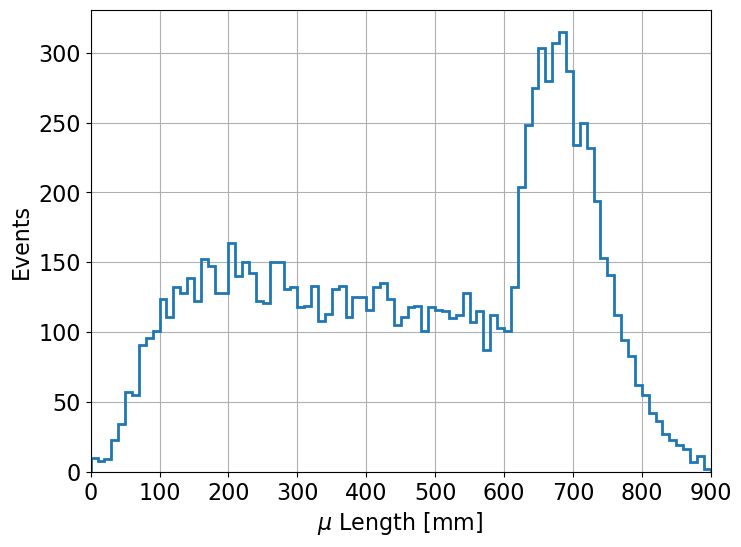

In [10]:
fig, ax = plt.subplots( figsize = (8, 6) )  

ax.hist(cosmic[(cosmic.muMaxLength>0)].muMaxLength, bins = np.linspace(0, 910, 92), histtype = 'step', lw = 2)
ax.set_xlabel( r'$\mu$ Length [mm]', fontsize = 16 )
ax.set_ylabel( r'Events', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 900])

ax.grid(":")
fig.savefig('CosmicMuonLength.pdf')

### Electron energy deposition in LArTPC

#### All electrons

In [11]:
cosmic[cosmic.eTotalE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,60,19.480109,5.299626,23.250693,48.155868,48.155868,270.147367,0.0,0.0,0.0,0.0,0.0,0.0,0.016032,0.003206,265.732584,0.0,0.0,0.0
1,0,251,0.084589,0.069128,0.021171,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,61.944021,0.0,0.0,0.0
2,0,364,0.392915,0.344161,0.300577,15.625915,15.625915,81.786198,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,14.896122,0.0,0.0,0.0
3,0,390,0.148901,0.126668,0.059747,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,147.840044,0.0,0.0,0.0
4,0,480,0.334323,0.334323,0.287406,18.008526,18.008526,103.657277,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18657,2499,392,22.664552,3.312128,7.976293,148.020208,148.020208,698.942647,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,143.987112,0.0,0.0,0.0
18658,2499,435,4.099408,1.040348,1.839662,56.114293,56.114293,294.473356,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,64.343670,0.0,0.0,0.0
18659,2499,562,1.590734,0.641247,0.589966,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,271.968224,0.0,0.0,0.0
18660,2499,595,6.216136,1.233605,2.199456,72.318518,72.318518,407.155860,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [12]:
cosmic.eMaxE.max()

99.84656024766548

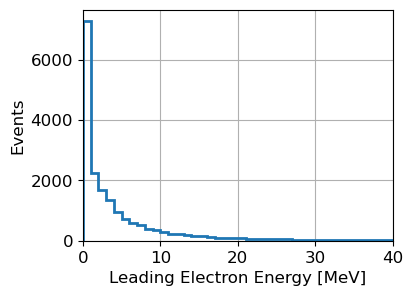

In [13]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic.eMaxE, bins = np.linspace(0, 40, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 40])

ax.grid(":")
# fig.savefig('CosmicAlleMaxE.pdf')

In [14]:
cosmic[cosmic.eMaxE>40.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
26,2,289,312.667059,79.527756,409.203115,119.086048,119.086048,632.718560,0.0,0.0,0.0,0.0,0.0,0.0,0.167956,0.003206,519.734562,0.0,0.0,0.0
125,14,269,84.746002,40.395908,172.304804,122.622470,122.622470,665.982825,0.0,0.0,0.0,0.0,0.0,0.0,0.086897,0.003206,508.059231,0.0,0.0,0.0
185,23,820,140.571350,52.219460,147.629255,103.747659,103.747659,548.905924,0.0,0.0,0.0,0.0,0.0,0.0,0.170973,0.003266,752.718241,0.0,0.0,0.0
411,54,148,219.912865,60.981500,298.387873,148.786675,148.786675,788.424417,0.0,0.0,0.0,0.0,0.0,0.0,0.148143,0.003206,684.303129,0.0,0.0,0.0
499,65,362,158.675953,42.598487,195.347168,124.627184,124.627184,678.384265,0.0,0.0,0.0,0.0,0.0,0.0,0.116981,0.003206,589.357854,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17883,2397,647,101.186502,43.930365,206.048564,125.137122,125.137122,656.313628,0.0,0.0,0.0,0.0,0.0,0.0,0.083968,0.003206,548.362371,0.0,0.0,0.0
17969,2409,958,69.053638,52.333010,247.638998,119.897302,119.897302,654.399434,0.0,0.0,0.0,0.0,0.0,0.0,0.045215,0.003206,908.728542,0.0,0.0,0.0
18463,2472,908,247.924755,72.274318,371.037683,112.354288,112.354288,591.510011,0.0,0.0,0.0,0.0,0.0,0.0,0.134920,0.003213,606.358795,0.0,0.0,0.0
18531,2481,963,75.690508,40.669067,181.381414,121.818717,121.818717,636.087933,0.0,0.0,0.0,0.0,0.0,0.0,0.042257,0.003206,343.521652,0.0,0.0,0.0


In [15]:
cosmic[(cosmic.eMaxE>40.)&(cosmic.muMaxLength<50.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
1317,174,778,69.719980,42.773480,191.518670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054507,0.003206,569.343193,0.0,0.0,0.0
2906,382,283,161.603239,48.405710,222.898043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167736,0.003206,709.892669,0.0,0.0,0.0
3291,434,729,159.771655,45.758786,211.325645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145388,0.003302,627.375256,0.0,0.0,0.0
6963,920,105,235.475097,55.010908,259.833158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210293,0.003206,675.017963,0.0,0.0,0.0
12155,1629,111,132.666450,45.432939,219.191083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119210,0.003206,815.450628,0.0,0.0,0.0
13271,1777,924,81.665589,41.083831,206.688408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080840,0.003206,529.975957,0.0,0.0,0.0


202 cosmic events (out of 2.5M) have an electron > 40 MeV, while 6 cosmic events (out of 2.5M) have an electron > 40 MeV but no muons > 5cm.

In [16]:
cosmic.eTotalE.max()

4015.344128006433

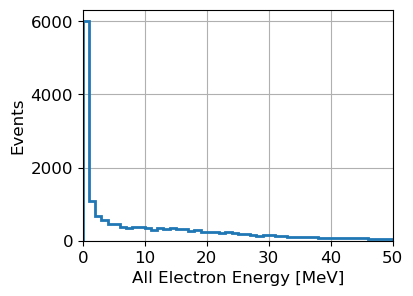

In [17]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic.eTotalE, bins = np.linspace(0, 50, 51), histtype = 'step', lw = 2)
ax.set_xlabel( r'All Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 50])

ax.grid(":")
# fig.savefig('CosmicAlleTotalE.pdf')

In [18]:
cosmic[cosmic.eTotalE>50]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
26,2,289,312.667059,79.527756,409.203115,119.086048,119.086048,632.718560,0.0,0.0,0.0,0.0,0.0,0.0,0.167956,0.003206,519.734562,0.0,0.0,0.0
53,5,747,55.823785,13.481158,51.969383,149.447560,149.447560,775.879446,0.0,0.0,0.0,0.0,0.0,0.0,0.026303,0.003206,822.269131,0.0,0.0,0.0
125,14,269,84.746002,40.395908,172.304804,122.622470,122.622470,665.982825,0.0,0.0,0.0,0.0,0.0,0.0,0.086897,0.003206,508.059231,0.0,0.0,0.0
149,18,702,84.541060,21.264618,93.393901,126.724371,126.724371,710.089988,0.0,0.0,0.0,0.0,0.0,0.0,0.060920,0.003206,307.168315,0.0,0.0,0.0
157,19,497,90.580651,39.952268,183.061595,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.055487,0.003206,479.202083,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,2496,366,88.903641,30.560809,158.635769,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.035922,0.003206,536.582597,0.0,0.0,0.0
18637,2497,130,91.613098,34.878479,160.463908,48.964743,48.964743,262.726277,0.0,0.0,0.0,0.0,0.0,0.0,0.078584,0.003206,696.683865,0.0,0.0,0.0
18647,2498,624,90.653570,31.133631,142.508096,113.879259,113.879259,602.283008,0.0,0.0,0.0,0.0,0.0,0.0,0.058411,0.003222,580.080529,0.0,0.0,0.0
18648,2498,670,75.076926,25.944225,100.835341,115.205458,115.205458,617.648994,0.0,0.0,0.0,0.0,0.0,0.0,0.051579,0.003206,450.840072,0.0,0.0,0.0


### Events with a muon track > 5cm

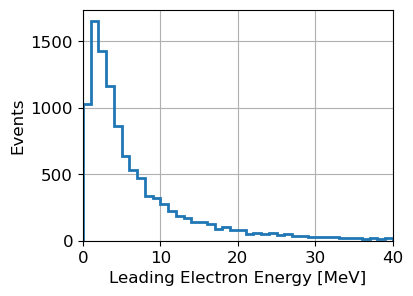

In [19]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic[cosmic.muMaxLength>50.].eMaxE, bins = np.linspace(0, 40, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 40])

ax.grid(":")
# fig.savefig('CosmicMuonAndeMaxE.pdf')

In [20]:
cosmic[(cosmic.muMaxLength>50.)&(cosmic.eMaxE>40)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
26,2,289,312.667059,79.527756,409.203115,119.086048,119.086048,632.718560,0.0,0.0,0.0,0.0,0.0,0.0,0.167956,0.003206,519.734562,0.0,0.0,0.0
125,14,269,84.746002,40.395908,172.304804,122.622470,122.622470,665.982825,0.0,0.0,0.0,0.0,0.0,0.0,0.086897,0.003206,508.059231,0.0,0.0,0.0
185,23,820,140.571350,52.219460,147.629255,103.747659,103.747659,548.905924,0.0,0.0,0.0,0.0,0.0,0.0,0.170973,0.003266,752.718241,0.0,0.0,0.0
411,54,148,219.912865,60.981500,298.387873,148.786675,148.786675,788.424417,0.0,0.0,0.0,0.0,0.0,0.0,0.148143,0.003206,684.303129,0.0,0.0,0.0
499,65,362,158.675953,42.598487,195.347168,124.627184,124.627184,678.384265,0.0,0.0,0.0,0.0,0.0,0.0,0.116981,0.003206,589.357854,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17883,2397,647,101.186502,43.930365,206.048564,125.137122,125.137122,656.313628,0.0,0.0,0.0,0.0,0.0,0.0,0.083968,0.003206,548.362371,0.0,0.0,0.0
17969,2409,958,69.053638,52.333010,247.638998,119.897302,119.897302,654.399434,0.0,0.0,0.0,0.0,0.0,0.0,0.045215,0.003206,908.728542,0.0,0.0,0.0
18463,2472,908,247.924755,72.274318,371.037683,112.354288,112.354288,591.510011,0.0,0.0,0.0,0.0,0.0,0.0,0.134920,0.003213,606.358795,0.0,0.0,0.0
18531,2481,963,75.690508,40.669067,181.381414,121.818717,121.818717,636.087933,0.0,0.0,0.0,0.0,0.0,0.0,0.042257,0.003206,343.521652,0.0,0.0,0.0


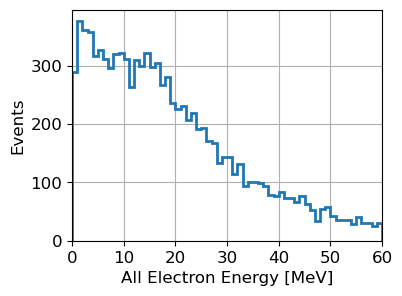

In [21]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic[cosmic.muMaxLength>50.].eTotalE, bins = np.linspace(0, 60, 61), histtype = 'step', lw = 2)
ax.set_xlabel( r'All Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 60])

ax.grid(":")
# fig.savefig('CosmicMuonAndeTotalE.pdf')

In [22]:
cosmic[(cosmic.muMaxLength>50.)&(cosmic.eTotalE>60.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
26,2,289,312.667059,79.527756,409.203115,119.086048,119.086048,632.718560,0.0,0.0,0.0,0.0,0.0,0.0,0.167956,0.003206,519.734562,0.0,0.0,0.0
125,14,269,84.746002,40.395908,172.304804,122.622470,122.622470,665.982825,0.0,0.0,0.0,0.0,0.0,0.0,0.086897,0.003206,508.059231,0.0,0.0,0.0
149,18,702,84.541060,21.264618,93.393901,126.724371,126.724371,710.089988,0.0,0.0,0.0,0.0,0.0,0.0,0.060920,0.003206,307.168315,0.0,0.0,0.0
171,20,958,100.909300,39.570771,193.124564,127.905011,127.905011,686.268266,0.0,0.0,0.0,0.0,0.0,0.0,0.115528,0.003206,367.968212,0.0,0.0,0.0
185,23,820,140.571350,52.219460,147.629255,103.747659,103.747659,548.905924,0.0,0.0,0.0,0.0,0.0,0.0,0.170973,0.003266,752.718241,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18616,2494,473,186.115443,43.392585,193.335705,139.325768,139.325768,752.098587,0.0,0.0,0.0,0.0,0.0,0.0,0.099454,0.003206,763.019744,0.0,0.0,0.0
18637,2497,130,91.613098,34.878479,160.463908,48.964743,48.964743,262.726277,0.0,0.0,0.0,0.0,0.0,0.0,0.078584,0.003206,696.683865,0.0,0.0,0.0
18647,2498,624,90.653570,31.133631,142.508096,113.879259,113.879259,602.283008,0.0,0.0,0.0,0.0,0.0,0.0,0.058411,0.003222,580.080529,0.0,0.0,0.0
18648,2498,670,75.076926,25.944225,100.835341,115.205458,115.205458,617.648994,0.0,0.0,0.0,0.0,0.0,0.0,0.051579,0.003206,450.840072,0.0,0.0,0.0


### Events without a muon track > 5cm

In [23]:
cosmic[cosmic.muMaxLength<50.].eMaxE.max()

55.01090849248075

In [24]:
cosmic[cosmic.muMaxLength<50.].eTotalE.max()

290.17150696416644

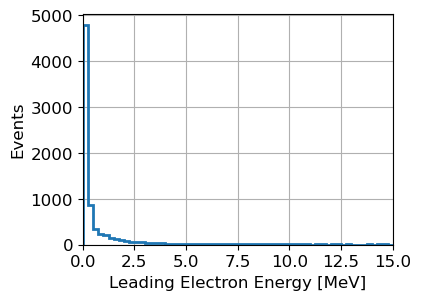

In [25]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic[cosmic.muMaxLength<50.].eMaxE, bins = np.linspace(0, 15, 61), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 15])

ax.grid(":")
# fig.savefig('CosmicNoMuonAndeMaxE.pdf')

In [26]:
len(cosmic[(cosmic.muMaxLength<50.)&(cosmic.eMaxE>15.)])

78

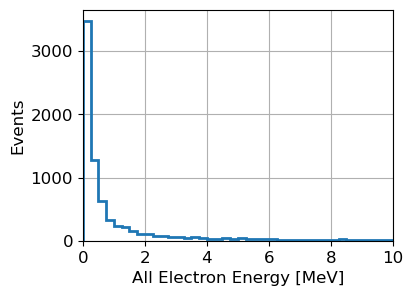

In [27]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(cosmic[cosmic.muMaxLength<50.].eTotalE, bins = np.linspace(0, 10, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'All Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 10])

ax.grid(":")
# fig.savefig('CosmicNoMuonAndeTotalE.pdf')

In [28]:
cosmic[(cosmic.muMaxLength<50.)&(cosmic.eTotalE>10.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
153,19,83,14.662752,6.968210,28.885888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,240.414544,0.0,0.0,0.0
157,19,497,90.580651,39.952268,183.061595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055487,0.003206,479.202083,0.0,0.0,0.0
261,34,749,12.028001,7.430617,23.871985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,415.765767,0.0,0.0,0.0
292,39,162,12.504888,3.895339,6.156443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012825,0.003206,840.711067,0.0,0.0,0.0
328,44,314,16.840897,14.427279,78.857137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016032,0.003206,233.681845,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18425,2468,18,19.068998,16.213245,52.540378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003533,0.003206,913.271704,0.0,0.0,0.0
18437,2469,193,14.552972,5.810706,21.725992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019238,0.003206,638.531815,0.0,0.0,0.0
18565,2487,310,19.567311,11.449584,49.201031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019930,0.003206,695.467556,0.0,0.0,0.0
18615,2494,450,21.876254,10.238567,43.471619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013152,0.003206,210.833711,0.0,0.0,0.0


In [29]:
cosmic[(cosmic.muMaxLength<50.)&(cosmic.eMaxE>5.)]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
95,10,308,7.348765,6.324952,26.400404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016358,0.003206,113.134992,0.0,0.0,0.0
99,11,123,8.258825,5.212990,13.434843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,538.866178,0.0,0.0,0.0
153,19,83,14.662752,6.968210,28.885888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,240.414544,0.0,0.0,0.0
157,19,497,90.580651,39.952268,183.061595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055487,0.003206,479.202083,0.0,0.0,0.0
160,19,787,5.781105,5.461302,20.162060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,525.125569,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18471,2473,586,8.631969,5.608363,18.942747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,308.896244,0.0,0.0,0.0
18490,2477,272,9.047167,7.716231,35.753311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,379.389724,0.0,0.0,0.0
18565,2487,310,19.567311,11.449584,49.201031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019930,0.003206,695.467556,0.0,0.0,0.0
18615,2494,450,21.876254,10.238567,43.471619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013152,0.003206,210.833711,0.0,0.0,0.0


### Events with charged pions

In [30]:
cosmic[cosmic.piMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength


### Events with protons

In [31]:
len(cosmic[cosmic.pMaxE>0.])

40

### Events with neutrons

In [32]:
cosmic[cosmic.nMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
30,2,905,1.582691,1.174728,2.215221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076297,0.065196,158.557542,0.003206,0.003206,349.717764,0.0,0.0,0.0
37,3,930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.309622,0.309622,603.972259,0.000000,0.000000,0.000000,0.0,0.0,0.0
45,4,771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034692,0.034692,657.287704,0.000000,0.000000,0.000000,0.0,0.0,0.0
63,6,624,18.867476,4.535974,15.104757,116.862257,116.862257,417.008239,0.000000,0.000000,0.000000,0.104247,0.104195,679.479327,0.019238,0.003206,282.111520,0.0,0.0,0.0
121,13,709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000056,0.000056,150.126317,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18571,2488,147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000002,718.438640,0.000000,0.000000,0.000000,0.0,0.0,0.0
18576,2488,629,0.556987,0.361367,0.312164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003419,0.003419,376.509989,0.000327,0.000327,297.810842,0.0,0.0,0.0
18577,2488,752,3.036282,0.683563,0.751052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.419953,0.251984,690.837530,0.009619,0.003206,581.024405,0.0,0.0,0.0
18583,2489,827,8.327194,1.001099,1.700435,54.051465,54.051465,133.235318,14.036724,14.036724,2.410811,0.185407,0.182091,624.360302,0.035549,0.003206,352.821710,0.0,0.0,0.0


In [33]:
cosmic[cosmic.nMaxE>0.].nTotalE.max()

0.8504409091183333

### Events with gammas

In [34]:
cosmic[cosmic.gMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,60,19.480109,5.299626,23.250693,48.155868,48.155868,270.147367,0.0,0.0,0.0,0.0,0.0,0.0,0.016032,0.003206,265.732584,0.0,0.0,0.0
1,0,251,0.084589,0.069128,0.021171,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,61.944021,0.0,0.0,0.0
2,0,364,0.392915,0.344161,0.300577,15.625915,15.625915,81.786198,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,14.896122,0.0,0.0,0.0
3,0,390,0.148901,0.126668,0.059747,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,147.840044,0.0,0.0,0.0
5,0,528,9.059547,6.116250,32.699851,39.150199,39.150199,203.782757,0.0,0.0,0.0,0.0,0.0,0.0,0.006413,0.003206,129.676346,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18655,2499,184,0.216438,0.119791,0.054374,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,159.156774,0.0,0.0,0.0
18656,2499,352,64.391443,13.176237,54.768167,130.115754,130.115754,686.141080,0.0,0.0,0.0,0.0,0.0,0.0,0.051301,0.003206,272.326955,0.0,0.0,0.0
18657,2499,392,22.664552,3.312128,7.976293,148.020208,148.020208,698.942647,0.0,0.0,0.0,0.0,0.0,0.0,0.009619,0.003206,143.987112,0.0,0.0,0.0
18659,2499,562,1.590734,0.641247,0.589966,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003206,0.003206,271.968224,0.0,0.0,0.0


In [35]:
cosmic[cosmic.gMaxE>0.].gTotalE.max()

3.041918150130659

## $\nu_e$-Ar Charged-Current Interaction

In [36]:
sigFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/evtv2/nueArCCSignalEvt.csv'
signal = pd.read_csv( sigFile )

In [37]:
signal

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,0,20.493230,15.237371,71.096024,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006413,0.003206,261.563854,0.0,0.0,0.0
1,0,1,18.806009,15.743186,64.938040,0.0,0.0,0.0,0.0,0.0,0.0,0.011525,0.011525,502.863571,0.016032,0.003206,351.022881,0.0,0.0,0.0
2,0,2,34.425985,25.637749,98.966923,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.035596,0.003206,562.429285,0.0,0.0,0.0
3,0,3,29.589827,20.508206,89.746525,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.022771,0.003206,669.223278,0.0,0.0,0.0
4,0,4,40.811681,29.338700,133.086729,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.042008,0.003206,454.854286,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9,9995,32.039225,18.381587,68.699477,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.026303,0.003206,543.553111,0.0,0.0,0.0
99996,9,9996,20.574330,9.045617,33.907679,0.0,0.0,0.0,0.0,0.0,0.0,0.123499,0.086591,320.163689,0.012825,0.003206,379.578665,0.0,0.0,0.0
99997,9,9997,26.820110,17.916317,74.219979,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.019254,0.003206,331.798750,0.0,0.0,0.0
99998,9,9998,38.055521,23.173106,108.279872,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.035299,0.003206,539.897522,0.0,0.0,0.0


In [38]:
signal.eMaxE.max()

42.39610729412113

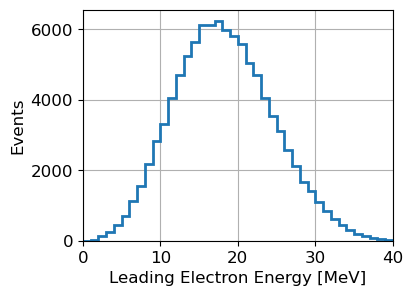

In [39]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(signal.eMaxE, bins = np.linspace(0, 40, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 40])

ax.grid(":")

In [40]:
signal[signal.eMaxE<1]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
2194,0,2194,2.101641,0.856682,1.154192,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006413,0.003206,562.086398,0.0,0.0,0.0
32489,3,2489,0.899661,0.677433,0.784995,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.023826,0.023826,148.247852,0.000000,0.000000,325.918269,0.0,0.0,0.0
72383,7,2383,2.505336,0.970620,2.161716,0.0,0.0,0.0,10.503064,10.503064,1.443489,0.000000,0.000000,0.000000,0.006413,0.003206,451.490755,0.0,0.0,0.0


In [41]:
signal.eMaxLength.max()

198.5316665606283

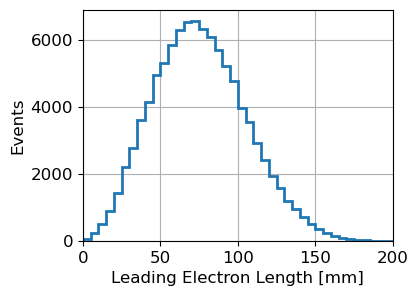

In [42]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(signal.eMaxLength, bins = np.linspace(0, 200, 41), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Length [mm]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 200])

ax.grid(":")

In [43]:
signal[signal.pMaxE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
15,0,15,30.134928,10.865809,50.088969,0.0,0.0,0.0,5.377986,5.377986,0.474871,0.0,0.0,0.0,0.025930,0.003206,491.280521,0.0,0.0,0.0
21,0,21,25.372317,23.539799,109.074865,0.0,0.0,0.0,7.319425,7.319425,0.795426,0.0,0.0,0.0,0.019238,0.003206,423.963986,0.0,0.0,0.0
23,0,23,14.712187,12.504085,48.184609,0.0,0.0,0.0,2.985427,2.985427,0.174658,0.0,0.0,0.0,0.006768,0.003206,338.803116,0.0,0.0,0.0
24,0,24,26.031655,19.999426,64.254766,0.0,0.0,0.0,7.798727,7.798727,0.894133,0.0,0.0,0.0,0.016125,0.003271,440.519110,0.0,0.0,0.0
35,0,35,17.114479,8.193242,32.442441,0.0,0.0,0.0,3.692284,3.692284,0.246238,0.0,0.0,0.0,0.019486,0.003206,457.382280,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99965,9,9965,22.478737,10.552105,49.231741,0.0,0.0,0.0,2.713864,2.713864,0.149843,0.0,0.0,0.0,0.025650,0.003206,693.535398,0.0,0.0,0.0
99968,9,9968,26.916888,15.562149,56.232185,0.0,0.0,0.0,10.559758,10.559758,1.510515,0.0,0.0,0.0,0.022444,0.003206,564.909641,0.0,0.0,0.0
99974,9,9974,22.328581,8.985766,32.651177,0.0,0.0,0.0,4.578730,4.578730,0.356672,0.0,0.0,0.0,0.019290,0.003258,716.598218,0.0,0.0,0.0
99981,9,9981,24.327734,19.705548,64.808992,0.0,0.0,0.0,3.455663,3.455663,0.225695,0.0,0.0,0.0,0.009945,0.003206,200.632411,0.0,0.0,0.0


8523 out of 100k (1e5) events have a proton.  8.5%.

## $\nu_e$-Ar Charged-Current Interaction outside the Fiducial Volume

In [44]:
dirtFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/evtv2/nueArCCoutFiducialEvt.csv'
dirt = pd.read_csv( dirtFile )

In [45]:
dirt

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,0,31.057740,20.380514,87.227557,0.0,0.0,0.0,0.0,0.0,0.0,0.057585,0.057585,115.599573,0.019238,0.003206,568.895779,0.0,0.0,0.0
1,0,1,0.766656,0.157639,0.086111,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.009619,0.003206,311.286538,0.0,0.0,0.0
2,0,3,1.609690,0.942383,1.474310,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.009619,0.003206,234.677850,0.0,0.0,0.0
3,0,4,44.458775,16.678509,66.044787,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.045215,0.003206,508.421417,0.0,0.0,0.0
4,0,7,0.958642,0.598058,0.676414,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003206,0.003206,193.392197,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233666,39,9993,1.520037,0.528793,0.514750,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003533,0.003206,625.024071,0.0,0.0,0.0
233667,39,9994,0.367608,0.139302,0.070089,0.0,0.0,0.0,0.0,0.0,0.0,0.001863,0.001863,885.780004,0.003206,0.003206,170.224678,0.0,0.0,0.0
233668,39,9996,0.801626,0.204998,0.132432,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000653,0.000327,396.547844,0.0,0.0,0.0
233669,39,9998,30.445219,19.592210,83.226770,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.035596,0.003206,358.618508,0.0,0.0,0.0


In [46]:
dirt.eMaxE.max()

42.01522396559372

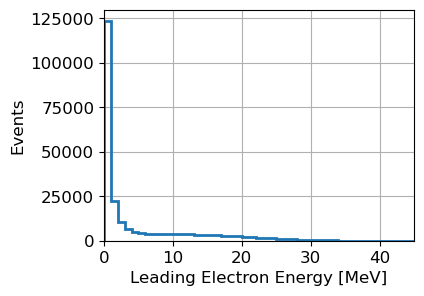

In [47]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(dirt.eMaxE, bins = np.linspace(0, 45, 46), histtype = 'step', lw = 2)
ax.set_xlabel( r'Leading Electron Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 45])

ax.grid(":")

In [48]:
dirt.muMaxE.max(), dirt.pMaxE.max(), dirt.nMaxE.max(), dirt.gMaxE.max(), dirt.piMaxE.max()

(0.0, 14.1313190920099, 0.7539348054342554, 0.0034007584526233, 0.0)

## Beam-Related Neutrons (BRN)

In [49]:
brnFile = '/Users/yuntse/data/coherent/preLArTPC/analysis/evtv2/brnEvt.csv'
brn = pd.read_csv( brnFile )

In [50]:
brn

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,2,3.092138,1.639740,3.623584,0.0,0.0,0.0,0.0,0.0,0.0,0.181650,0.123760,380.778330,0.006413,0.003206,491.941111,0.0,0.0,0.0
1,0,4,1.364651,0.387829,0.360767,0.0,0.0,0.0,0.0,0.0,0.0,0.279687,0.159008,597.073843,0.009619,0.003206,343.030677,0.0,0.0,0.0
2,0,8,3.598699,1.823932,5.924912,0.0,0.0,0.0,0.0,0.0,0.0,0.251816,0.176925,507.367425,0.000327,0.000327,512.689297,0.0,0.0,0.0
3,0,9,0.113136,0.068647,0.020916,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003206,0.003206,105.693074,0.0,0.0,0.0
4,0,11,0.281518,0.178020,0.105220,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,209.349481,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189903,49,9988,0.609892,0.151219,0.080370,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,719.540159,0.003533,0.003206,171.838173,0.0,0.0,0.0
189904,49,9990,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,180.779549,0.000000,0.000000,0.000000,0.0,0.0,0.0
189905,49,9995,0.686547,0.268897,0.204447,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,380.588175,0.000000,0.000000,665.857263,0.0,0.0,0.0
189906,49,9998,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.056480,0.056480,449.591091,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [51]:
brn[brn.eTotalE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
0,0,2,3.092138,1.639740,3.623584,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.181650,0.123760,380.778330,0.006413,0.003206,491.941111,0.0,0.0,0.0
1,0,4,1.364651,0.387829,0.360767,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.279687,0.159008,597.073843,0.009619,0.003206,343.030677,0.0,0.0,0.0
2,0,8,3.598699,1.823932,5.924912,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.251816,0.176925,507.367425,0.000327,0.000327,512.689297,0.0,0.0,0.0
3,0,9,0.113136,0.068647,0.020916,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.003206,0.003206,105.693074,0.0,0.0,0.0
4,0,11,0.281518,0.178020,0.105220,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,209.349481,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189900,49,9980,1.903769,0.737399,0.644747,0.0,0.0,0.0,2.82029,2.82029,0.159497,0.263201,0.154039,689.709509,0.012825,0.003206,279.946024,0.0,0.0,0.0
189901,49,9981,0.101155,0.042450,0.010251,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,281.153373,0.006413,0.003206,105.184172,0.0,0.0,0.0
189903,49,9988,0.609892,0.151219,0.080370,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,719.540159,0.003533,0.003206,171.838173,0.0,0.0,0.0
189905,49,9995,0.686547,0.268897,0.204447,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,380.588175,0.000000,0.000000,665.857263,0.0,0.0,0.0


In [52]:
brn.eTotalE.max(), brn.eMaxE.max(),  brn.nTotalE.max(), brn.nMaxE.max(), brn.gTotalE.max(), brn.gMaxE.max()


(194.99689609777167,
 50.79165688243921,
 2.01735531399754,
 1.0000237487911363,
 0.1422074576413358,
 0.0033947220092503)

In [53]:
brn.muTotalE.max(), brn.pTotalE.max(), brn.piTotalE.max()

(13.412651055572098, 334.4063531454025, 148.72880505101955)

In [54]:
brn.muMaxE.max(), brn.pMaxE.max(), brn.piMaxE.max()

(13.412651055572098, 314.36519960105295, 148.72880505101955)

(0.0, 150.0)

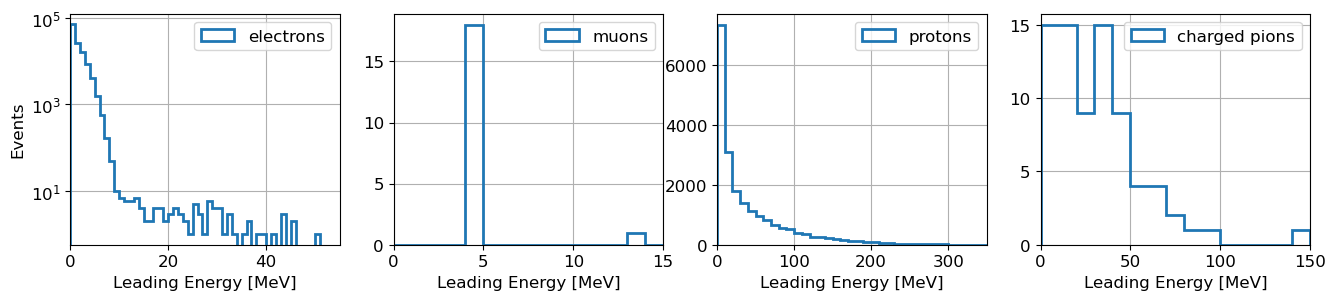

In [55]:
fig, ax = plt.subplots(1, 4, figsize = (16, 3) )  

ax[0].hist(brn[brn.eTotalE>0.].eMaxE, bins = np.linspace(0, 55, 56), histtype = 'step', lw = 2, label = 'electrons')
ax[1].hist(brn[brn.muTotalE>0.].muMaxE, bins = np.linspace(0, 15, 16), histtype = 'step', lw = 2, label = 'muons')
ax[2].hist(brn[brn.pTotalE>0.].pMaxE, bins = np.linspace(0, 350, 36), histtype = 'step', lw = 2, label = 'protons')
ax[3].hist(brn[brn.piTotalE>0.].piMaxE, bins = np.linspace(0, 150, 16), histtype = 'step', lw = 2, label = 'charged pions')


for iax in ax:
    iax.set_xlabel( r'Leading Energy [MeV]', fontsize = 12 )
    iax.tick_params(axis = 'x', labelsize = 12)
    iax.tick_params(axis = 'y', labelsize = 12)
    iax.grid(":")
    iax.legend(fontsize = 12)
    # iax.semilogy()

ax[0].set_ylabel( r'Events', fontsize = 12 )
ax[0].semilogy()
ax[0].set_xlim([0, 55])
ax[1].set_xlim([0, 15])
ax[2].set_xlim([0, 350])
ax[3].set_xlim([0, 150])

In [56]:
brn[brn.muTotalE>0.]

,Run,Event,eTotalE,eMaxE,eMaxLength,muTotalE,muMaxE,muMaxLength,pTotalE,pMaxE,pMaxLength,nTotalE,nMaxE,nMaxLength,gTotalE,gMaxE,gMaxLength,piTotalE,piMaxE,piMaxLength
5343,1,4224,44.039329,20.770082,73.869779,4.119813,4.119813,1.286277,19.857805,13.796965,2.376384,0.113273,0.063304,620.121412,0.054834,0.003206,467.492653,12.728858,12.728858,8.355048
12101,3,2010,41.284742,13.397061,67.244464,4.119813,4.119813,1.193262,42.970632,42.970632,17.973437,0.620708,0.200539,602.274837,0.022771,0.003206,481.160644,19.575178,19.575178,18.372181
14440,3,8000,24.751749,11.466427,45.763931,4.119813,4.119813,1.194466,0.000000,0.000000,0.000000,1.250547,0.365303,745.492486,0.038476,0.003206,559.679473,8.536497,8.536497,3.766350
15045,3,9559,14.187316,4.731973,22.926328,4.119813,4.119813,1.175923,0.000000,0.000000,0.000000,0.274844,0.071681,623.893287,0.019238,0.003206,515.727572,7.658945,7.658945,3.034074
16523,4,3505,15.820423,10.671630,49.976494,4.119813,4.119813,1.284266,0.000000,0.000000,0.000000,0.218826,0.184837,777.300262,0.022444,0.003206,827.868354,35.177342,35.177342,47.607254
19310,5,659,11.408903,3.571299,12.176023,4.119813,4.119813,1.196853,109.821421,109.821421,92.232466,0.227702,0.075013,679.026182,0.019238,0.003206,501.583377,4.906020,4.906020,1.275278
21265,5,5941,56.542213,25.393734,114.990730,4.119813,4.119813,1.197279,7.465821,7.465821,0.803915,0.413062,0.178145,491.500500,0.051627,0.003206,783.386763,8.018415,8.018415,3.345475
29486,7,7532,35.537971,16.682352,71.080948,4.119813,4.119813,1.195732,0.000000,0.000000,0.000000,0.032872,0.032872,827.632394,0.042008,0.003206,477.823017,64.712041,64.712041,142.410191
30118,7,9135,55.322589,29.277348,132.925099,4.119813,4.119813,1.241694,0.000000,0.000000,0.000000,0.197732,0.071808,894.890173,0.074398,0.003206,559.805897,39.834556,39.834556,60.027030
54775,14,3997,17.378931,13.306152,65.468951,4.119813,4.119813,1.169432,0.000000,0.000000,0.000000,0.132016,0.097730,664.590836,0.025734,0.003290,411.615872,7.496358,7.496358,2.941931


(0.0, 100.0)

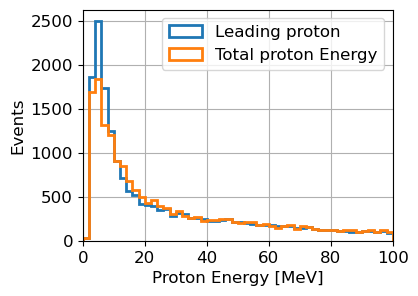

In [57]:
fig, ax = plt.subplots( figsize = (4, 3) )

ax.hist(brn[brn.pTotalE>0.].pMaxE, bins = np.linspace(0, 100, 51), histtype = 'step', lw = 2, label = 'Leading proton')
ax.hist(brn[brn.pTotalE>0.].pTotalE, bins = np.linspace(0, 100, 51), histtype = 'step', lw = 2, label = 'Total proton Energy')

ax.set_xlabel( r'Proton Energy [MeV]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.grid(":")
ax.legend(fontsize = 12)

ax.set_xlim([0, 100])

## Scale of Each Sample

### Mass of the LAr outside the fiducial volume

V = &pi;r<sup>2</sup>h - 50x40x50, \
where r = 46cm, h = 120cm. \
LAr density = 1.39 g/cm<sup>3</sup> \
Expect 55.9 $\nu_e$-Ar CC interactions in 66.72 kg of LAr

In [58]:
r = 46
h = 120
# unit: cm^2
Vout = np.pi*(46.**2)*120 - 50*40*50
# unit: kg, so divided by 1000
Mout = 1.39*Vout/1000.
Mout

969.8213571733331

In [59]:
nExpOut = 55.9/66.72*Mout
nExpOut

812.545171852358

## Scales of each samples

|        |  Expected number of events per year | Generated number of events | Scale |
|--------|-------------------------------------|----------------------------|-------|
| $\nu_e$-Ar CC signal | 116.5 | 1e5 | 0.001165 |
| Cosmics | 1.08e9 | 2.5e6 | 432 |
| BRN | 1.56e5 | 5e5 | 0.312 |
| $\nu_e$-Ar CC out fiducial | 813 | 4e5 | 0.0020325 |

In [60]:
fCosmic = 432.
fNueSignal = 116.5/1e5
fNueOutFiducial = 813./4e5
fBRN = 1.56/5.
fNueSignal, fNueOutFiducial, fBRN

(0.001165, 0.0020325, 0.312)

In [61]:
cosmicNoMuon = cosmic[cosmic.muMaxLength<50.]